# Business Objective: Identify Risky Applicant

### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


In [1]:
#Importing Libraries for data Cleaning and Ploting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the data 
lndf = pd.read_csv('loan.csv',low_memory=False)

In [3]:
#Setting this option to see all the columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
lndf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
lndf.shape

(39717, 111)

# Data Cleaning 

In [6]:
#Finding percentage of null or missing values
null_perc = round(100*(lndf.isnull().sum()/len(lndf.index)), 2)
#Printing columns which have more than 50% missing values
null_perc[ null_perc > 50]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

In [7]:
#Removing colums which has 100% values
lndf.drop(null_perc[ null_perc > 99 ].index, axis=1, inplace=True)

In [8]:
lndf.shape

(39717, 57)

In [9]:
lndf.nunique().sort_values().head(10)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
dtype: int64

In [10]:
#Removing rows which has only one unique value
lndf.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','initial_list_status','collections_12_mths_ex_med','pymnt_plan'], axis=1, inplace=True)
lndf.shape


(39717, 48)

In [11]:
#Removing rows which has loan status as Current. Since we dont know the customer will fully pay or not
lndf = lndf[lndf.loan_status != 'Current']
lndf.shape

(38577, 48)

In [12]:
lndf.nunique().sort_values().head(5)

next_pymnt_d     0
out_prncp        1
out_prncp_inv    1
loan_status      2
term             2
dtype: int64

In [13]:
#Removing row with only nulls and single values
lndf.drop(['next_pymnt_d','out_prncp','out_prncp_inv'], axis=1, inplace=True)
lndf.shape

(38577, 45)

In [14]:
lndf.nunique().sort_values(ascending=False).head(10)

id                 38577
url                38577
member_id          38577
total_pymnt        36714
total_pymnt_inv    36387
last_pymnt_amnt    34418
total_rec_int      34025
emp_title          28027
desc               25803
revol_bal          21275
dtype: int64

In [15]:
#Removing url and member_id since id,url and member _id are having unique value for all the row.
lndf.drop(['url','member_id','id'], axis=1, inplace=True)
lndf.shape

(38577, 42)

In [16]:
lndf.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
lndf.drop(['delinq_2yrs','revol_bal','total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','mths_since_last_delinq','mths_since_last_record','funded_amnt','total_pymnt_inv'], axis=1, inplace=True)
lndf.shape

(38577, 28)

In [18]:
lndf.nunique().sort_values().tail(10)

zip_code             822
loan_amnt            870
revol_util          1088
dti                 2853
annual_inc          5215
funded_amnt_inv     8050
installment        15022
title              19297
desc               25803
emp_title          28027
dtype: int64

In [19]:
#Removing emp_title,desc and title, since it has too many unique value to derive any insites
lndf.drop(['emp_title','desc','title'], axis=1, inplace=True)
lndf.shape


(38577, 25)

In [20]:
lndf.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,Jan-85,1,3,0,83.70%,9,May-16,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,Apr-99,5,3,0,9.40%,4,Sep-13,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,Nov-01,2,2,0,98.50%,10,May-16,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,Feb-96,1,10,0,21%,37,Apr-16,0.0
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,Nov-04,3,9,0,28.30%,12,Jan-16,0.0


In [21]:
#Converting int_rate to float value
lndf.int_rate=lndf.int_rate.astype(str).str.rstrip('%').astype('float')


In [22]:
lndf.dtypes

loan_amnt                 int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_util               object
total_acc                 int64
last_credit_pull_d       object
pub_rec_bankruptcies    float64
dtype: object

In [23]:
#converting issue date to date time
lndf.issue_d = pd.to_datetime(lndf.issue_d, format='%b-%y')


In [24]:
lndf['issue_d_month'] = lndf['issue_d'].dt.month
lndf['issue_d_year'] = lndf['issue_d'].dt.year


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


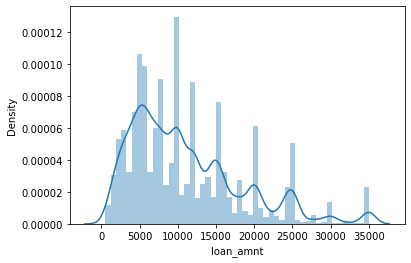

In [25]:
#checking distrbution of loan amount
sns.distplot(lndf.loan_amnt)
plt.show()

In [26]:
(lndf.purpose.value_counts()*100)/len(lndf)


debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

# Data Analysis

## Univariate Analysis

In [27]:

lndf.loan_status.value_counts(normalize=True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

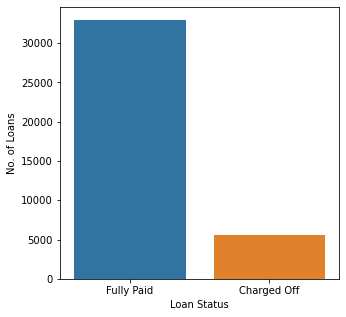

In [28]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x="loan_status", data=lndf)
ax.set(xlabel='Loan Status', ylabel='No. of Loans')
plt.show()

##### Inferance
Almost 15% of the loans are defaulted.(Around 5k loan) 

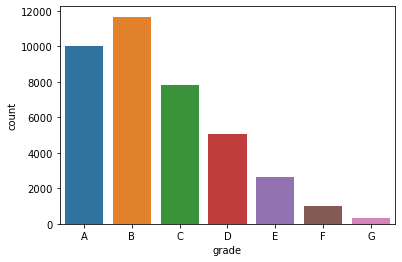

In [29]:
sns.countplot(x='grade', data=lndf,order=['A','B','C','D','E','F','G'])
plt.show()

##### Inferance
Most of the lone is given to A,B and C grade account.

In [30]:
#Converting emp_length object to float value
lndf['emp_length_years'] = lndf['emp_length'].str.rstrip('years ')
lndf['emp_length_years'].replace({'10+': '10'}, inplace=True)
lndf['emp_length_years'][lndf['emp_length_years'] == '< 1'] = '0.5'
del lndf['emp_length']

/var/folders/q7/hmx6tgn92lxcy_gnc9nylxl00000gn/T/ipykernel_63249/2243964548.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lndf['emp_length_years'][lndf['emp_length_years'] == '< 1'] = '0.5'


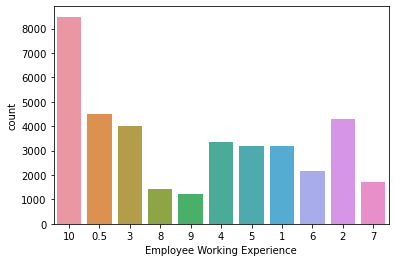

In [31]:
sns.countplot(x='emp_length_years', data=lndf)
plt.xlabel('Employee Working Experience')
plt.show()

##### Inferance
Majority of employees applying for the loan have more than 10 years of experience

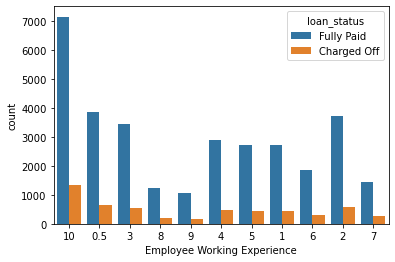

In [32]:
sns.countplot(x='emp_length_years', hue='loan_status', data=lndf)
plt.xlabel('Employee Working Experience')
plt.show()

In [33]:
only_charged_off = lndf[lndf.loan_status == 'Charged Off']


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Home Ownership'), Text(0, 0.5, 'No. of Loans')]

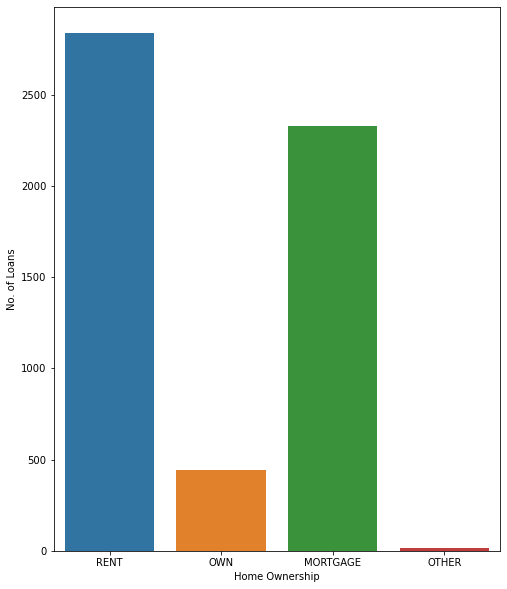

In [34]:
plt.figure(figsize=(8,10))
ax = sns.countplot(only_charged_off['home_ownership'])
ax.set(xlabel='Home Ownership', ylabel='No. of Loans')

##### Inferance
Max no. of loans are charged off for people who are living on rent.


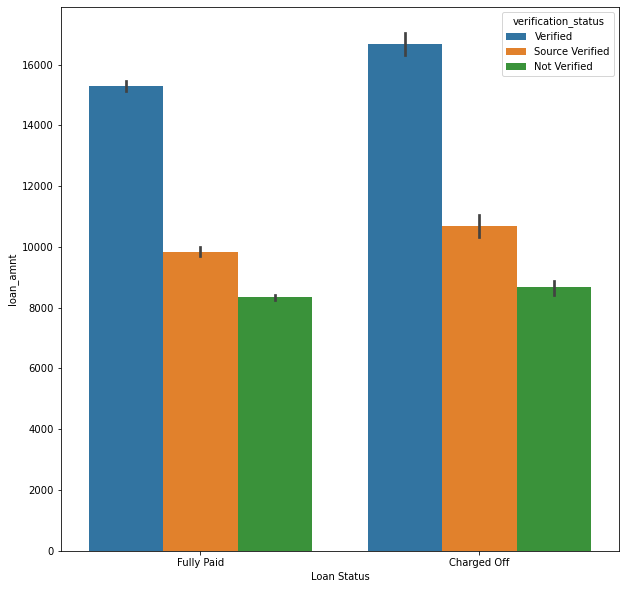

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_status',y='loan_amnt', hue='verification_status', data=lndf)
plt.xlabel("Loan Status")
plt.show()

##### Inferance
Max no. of loans are charged off where verification status is Verified.


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

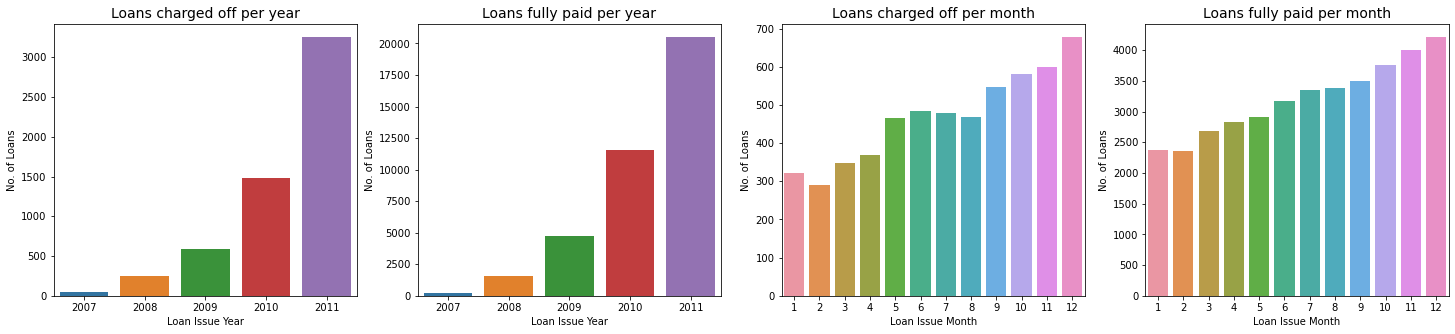

In [38]:
#year wise distribution of loans that are charged off
plt.figure(figsize=(25,5))
plt.subplot(1, 4, 1)
ax1=sns.countplot(only_charged_off['issue_d_year'], order=sorted(only_charged_off.issue_d_year.unique()))
ax1.set_title('Loans charged off per year', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 2)
ax2=sns.countplot(lndf['issue_d_year'], order=sorted(lndf.issue_d_year.unique()))
ax2.set_title('Loans fully paid per year', fontsize=14)
ax2.set(xlabel='Loan Issue Year', ylabel='No. of Loans')

#month wise distribution of loans that are charged off
plt.subplot(1, 4, 3)
ax3=sns.countplot(only_charged_off['issue_d_month'], order=sorted(only_charged_off.issue_d_month.unique()))
ax3.set_title('Loans charged off per month', fontsize=14)
ax3.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

#month wise distribution of loans that are fully paid
plt.subplot(1, 4, 4)
ax4=sns.countplot(lndf['issue_d_month'], order=sorted(lndf.issue_d_month.unique()))
ax4.set_title('Loans fully paid per month', fontsize=14)
ax4.set(xlabel='Loan Issue Month', ylabel='No. of Loans')

plt.show()

#### Inferance

1. No. of loans, fully paid and charged off are increasing every year. They are at maximum in the year 2011.

2. The month-wise trend shows that most loans are fully paid as well as charged off as the year comes to an end, maximum in the month of December clearly stating the importance of year-end.

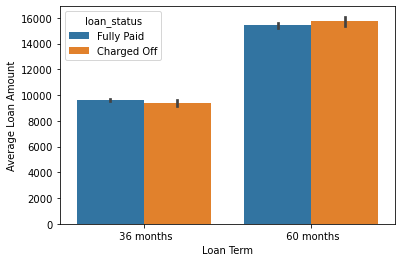

In [39]:
ax = sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=lndf, estimator=np.mean)
ax.set(xlabel='Loan Term', ylabel='Average Loan Amount')
plt.show()

#### Inferance

1. The average loan amount is similar for both the terms for both loan status.
2. The average loan amount is higher for the 60 month term.


### Bivariate Analysis

In [40]:
'''
df : Dataframe
col: Column Name
'''
def crosstab(df,col):
    
    crosstab = pd.crosstab(df[col], df['loan_status'],margins=True)
    crosstab['Percentage_Charged Off'] = round(((100*crosstab['Charged Off'])/crosstab['All']),3)
    crosstab = crosstab[0:-1]
    return crosstab

In [41]:
# Probability of charge off
'''
df      : Dataframe
col     : Column Name
stacked : True(default) for Stacked Bar
'''

def bivariate_prob(df,col,stacked= True):
    
    # get dataframe from crosstab function
    plotCrosstab = crosstab(df,col)
    
    linePlot = plotCrosstab[['Percentage_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    ax2.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
purpose,,,,
car,160,1339,1499,10.674
credit_card,542,4485,5027,10.782
debt_consolidation,2767,15288,18055,15.325
educational,56,269,325,17.231
home_improvement,347,2528,2875,12.070
house,59,308,367,16.076
major_purchase,222,1928,2150,10.326
medical,106,575,681,15.565
moving,92,484,576,15.972


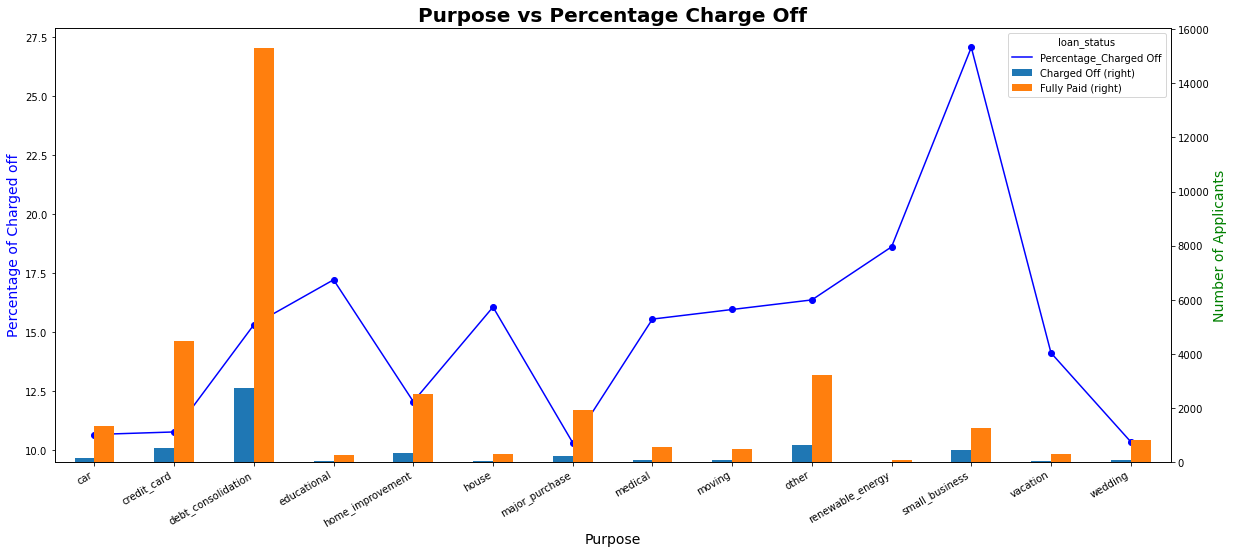

In [42]:
#Purpose of loan w.r.t % of loans charged off and no. of loan applicants

purpose = crosstab(lndf,'purpose')
display(purpose)

bivariate_prob(df = lndf,col ='purpose',stacked=False) 

#### Inferance

1. Maximum no. of loans i.e. 17487 are accepted for the purpose of Debt Consolidation out of which 14827 are fully paid and 2660 are charged off i.e. 15.2%
2. Maximum % of a loan being charged off is for the purpose of small business and the % is 27.1.

In [43]:
#Making bins for Loan Amount
bins = [0, 5000, 10000, 15000, 20000, 25000,30000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000' , '30000 and above']
lndf['loan_amnt_range'] = pd.cut(lndf['loan_amnt'], bins, labels=slot)

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
loan_amnt_range,,,,
0-5000,1314,8158,9472,13.872
5000-10000,1642,11160,12802,12.826
10000-15000,1055,6628,7683,13.732
15000-20000,751,3598,4349,17.268
20000-25000,542,2294,2836,19.111
25000-30000,143,557,700,20.429
30000 and above,180,555,735,24.490


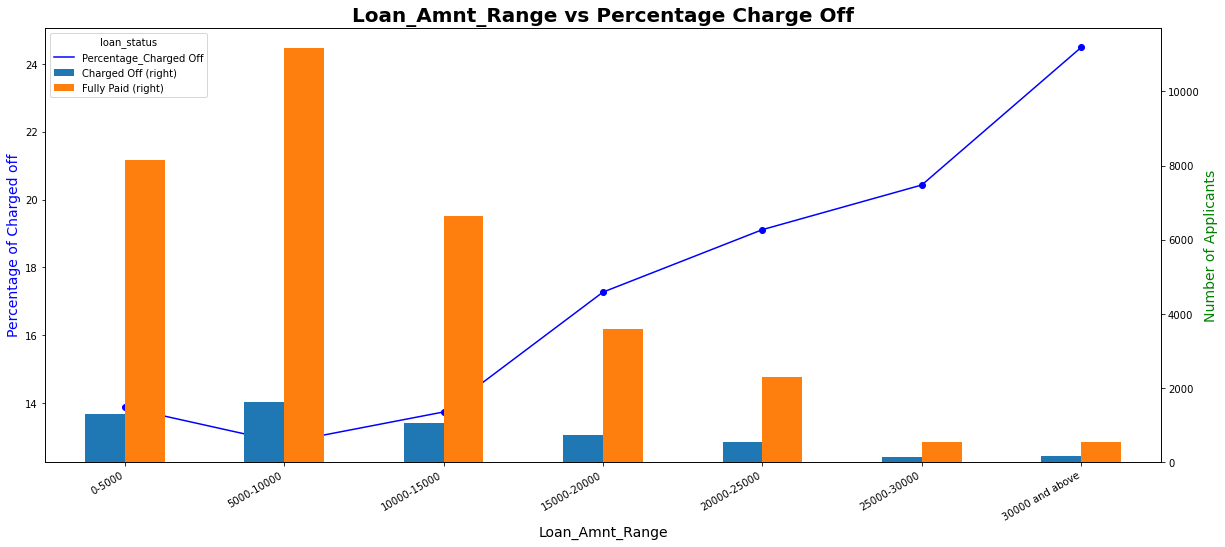

In [44]:
#Plotting the loan amount w.r.t % of loans charged off and no. of loan applicants. 
loan_amnt_range = crosstab(lndf,'loan_amnt_range')
display(loan_amnt_range)

bivariate_prob(df = lndf,col ='loan_amnt_range',stacked=False) 

#### Inferance


1. As the loan amount increases, The probablity of loan being charged off increases. It is maximum, 29.47% for the amount of 30000+
2. The maximum no. of loans, 12410 are applied where the loan amount ranges between 5000 and 10000.


In [45]:
#Making bins for annual_inc_range
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
lndf['annual_inc_range'] = pd.cut(lndf['annual_inc'], bins, labels=slot)


loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
annual_inc_range,,,,
0-25000,488,2062,2550,19.137
25000-50000,2125,10714,12839,16.551
50000-75000,1686,9982,11668,14.450
75000-100000,736,5303,6039,12.187
100000 and above,591,4876,5467,10.810


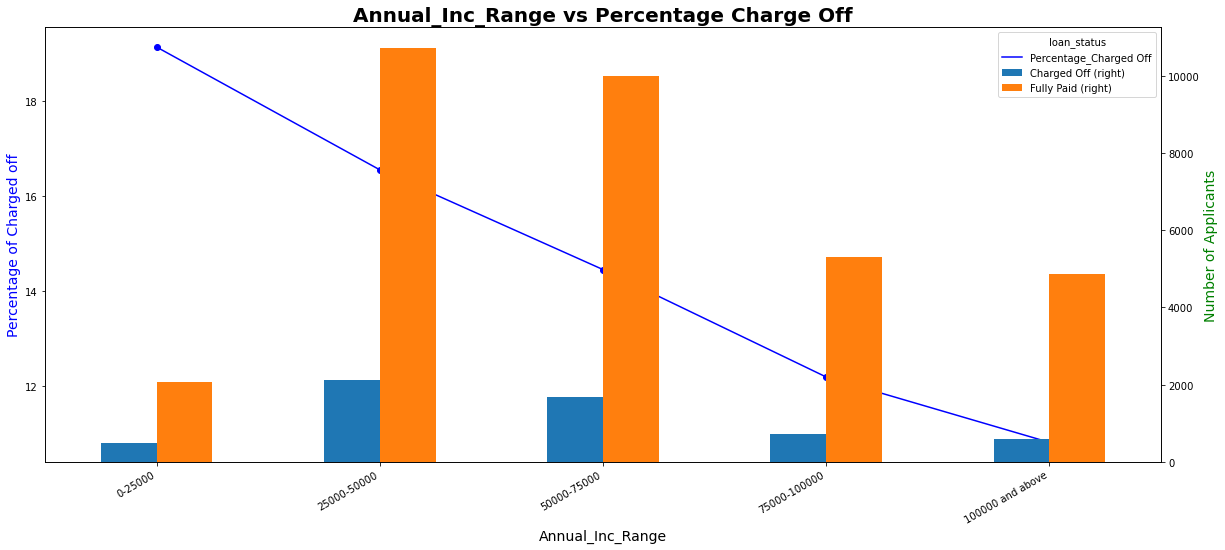

In [46]:
#Plotting the annual_inc_range w.r.t % of loans charged off and no. of loan applicants. 
annual_inc_range = crosstab(lndf,'annual_inc_range')
display(annual_inc_range)

bivariate_prob(df = lndf,col ='annual_inc_range',stacked=False) 

### Inferance

1. As the Annual Income is increasing, The % of loan getting charged off is decreasing.It is minimum for income more than 100000 and maximum where annual income less than 25000.
2. Maximum loans are applied by applicants whose annual income is between 25000 and 75000.


In [47]:
#Making bins for interest range
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
lndf['int_rate_range'] = pd.cut(lndf['int_rate'], bins, labels=slot)


loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
int_rate_range,,,,
0-7.5,256,5114,5370,4.767
7.5-10,574,6372,6946,8.264
10-12.5,1232,8148,9380,13.134
12.5-15,1475,7410,8885,16.601
15 and above,1794,5432,7226,24.827


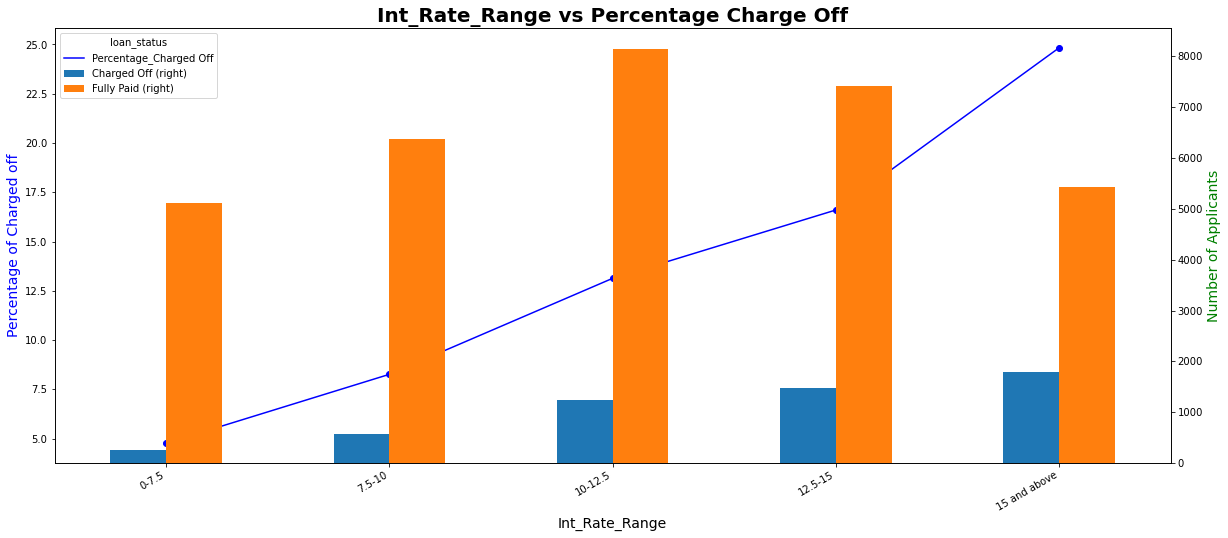

In [48]:
#Plotting the int_rate_range w.r.t % of loans charged off and no. of loan applicants. 
int_rate_range = crosstab(lndf,'int_rate_range')
display(int_rate_range)

bivariate_prob(df =lndf,col ='int_rate_range',stacked=False) 

#### Inferance

1. As the Interest Rate is increasing, The % of loan getting charged off is also increasing.It is minimum for interest rate below 7.5.
2. Maximum loans are applied by applicants where the interest rate is between 10 and 15%.

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
grade,,,,
A,602,9443,10045,5.993
B,1425,10250,11675,12.206
C,1347,6487,7834,17.194
D,1118,3967,5085,21.986
E,715,1948,2663,26.849
F,319,657,976,32.684
G,101,198,299,33.779


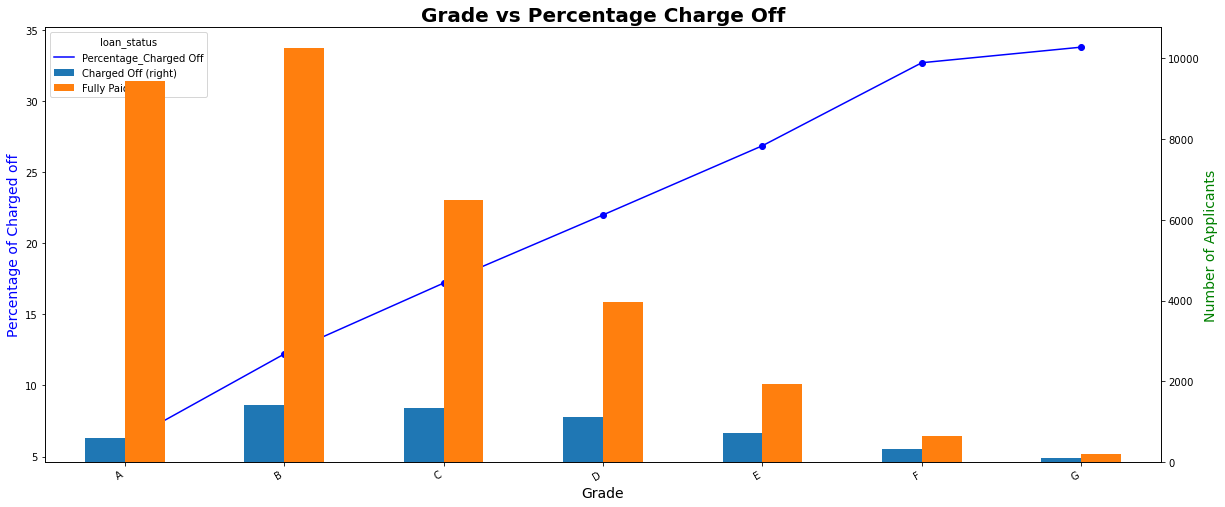

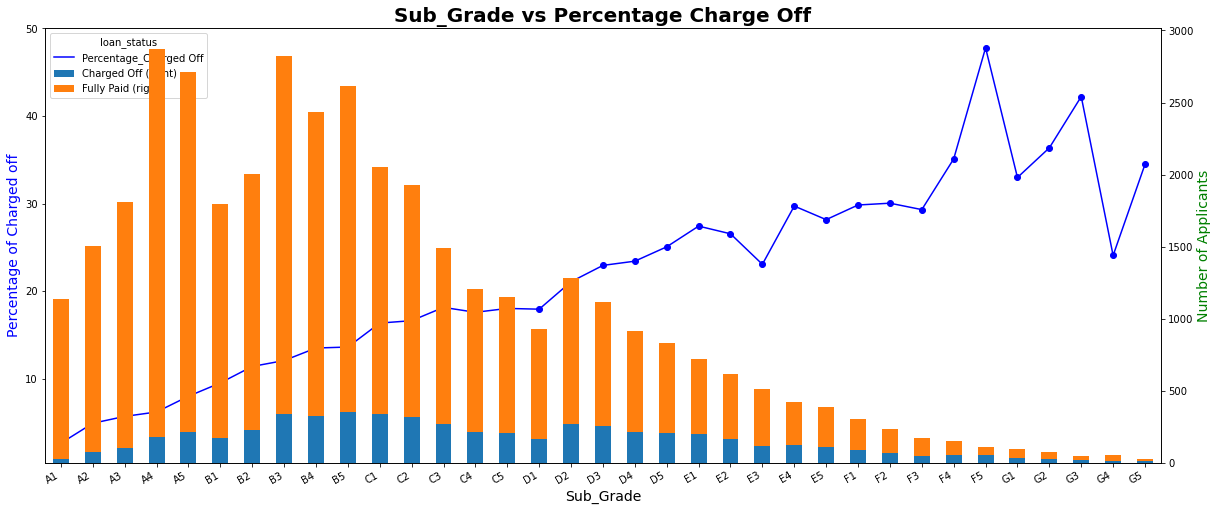

In [49]:
#Plotting the grade w.r.t % of loans charged off and no. of loan applicants. 
grade = crosstab(lndf,'grade')
display(grade)

bivariate_prob(df = lndf,col ='grade',stacked=False) 
#Plotting the sub grade w.r.t % of loans charged off and no. of loan applicants.
bivariate_prob(df = lndf,col ='sub_grade')

#### Inferance

1. Grade A and B loans are safe. Within these the sub-grades A4 and B3 have the highest number of loan applicants.
2. Grade E, F, G loans are less safe as compared to others.

loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
term,,,,
36 months,3227,25869,29096,11.091
60 months,2400,7081,9481,25.314


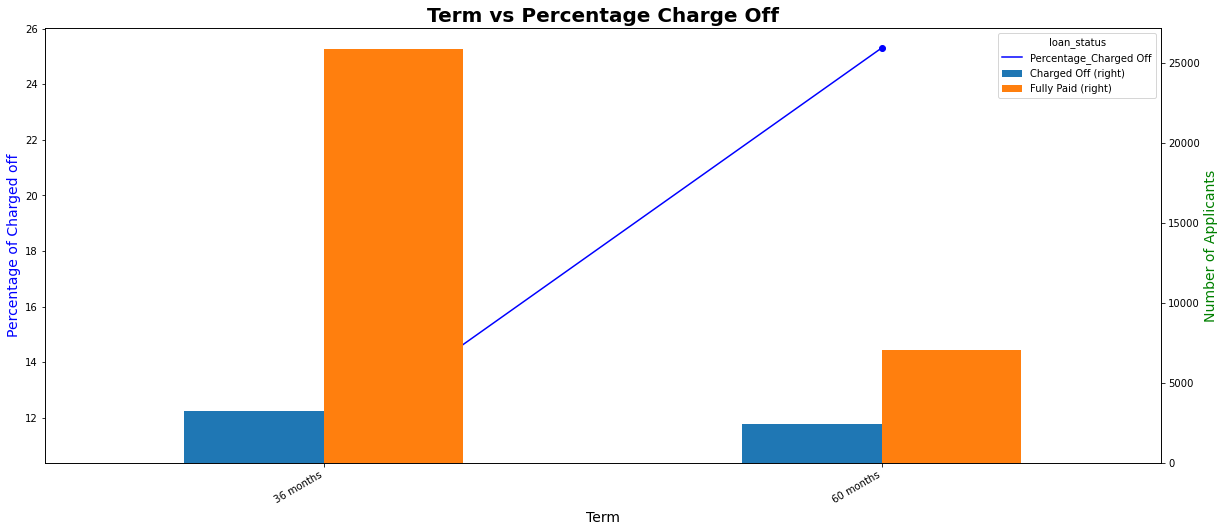

In [50]:
#Plotting the term w.r.t % of loans charged off and no. of loan applicants. 
term = crosstab(lndf,'term')
display(term)

bivariate_prob(df = lndf,col ='term',stacked=False)

#### Inferance

1. Percentage of loans getting charged-off for 60 month term is 25.2% higher as compared to 36 month term i.e. 10.9%
2. Total no. of loan applications are very high for 36 month term as compared to 60 month term.

In [51]:
filter_states = lndf.addr_state.value_counts()
filter_states = filter_states[(filter_states < 10)]

loan_filter_states = lndf.drop(labels = lndf[lndf.addr_state.isin(filter_states.index)].index)


loan_status,Charged Off,Fully Paid,All,Percentage_Charged Off
addr_state,,,,
AK,15,63,78,19.231
AL,54,381,435,12.414
AR,27,208,235,11.489
AZ,123,726,849,14.488
CA,1125,5824,6949,16.189
CO,98,668,766,12.794
CT,94,632,726,12.948
DC,15,196,211,7.109
DE,12,101,113,10.619


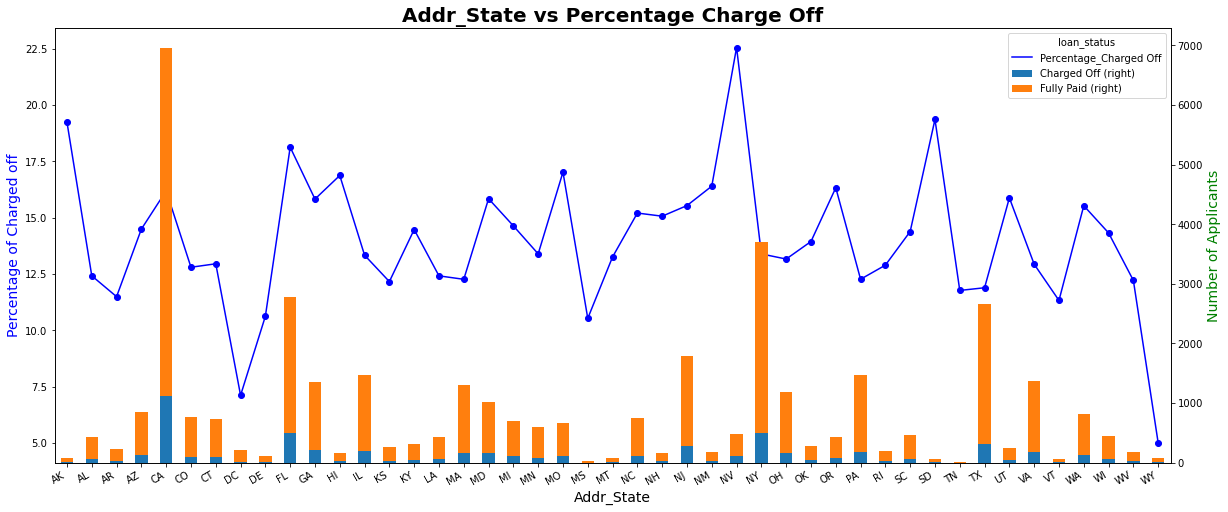

In [52]:
states = crosstab(loan_filter_states,'addr_state')
display(states)

bivariate_prob(df =loan_filter_states,col ='addr_state')

#### Inferance

1. Maximum no. of loans are applied by people from CA.
2. Maximum percent of loans are charged off for people of NV.

[Text(0.5, 0, 'Loan Issue Year'), Text(0, 0.5, 'Loan Amount')]

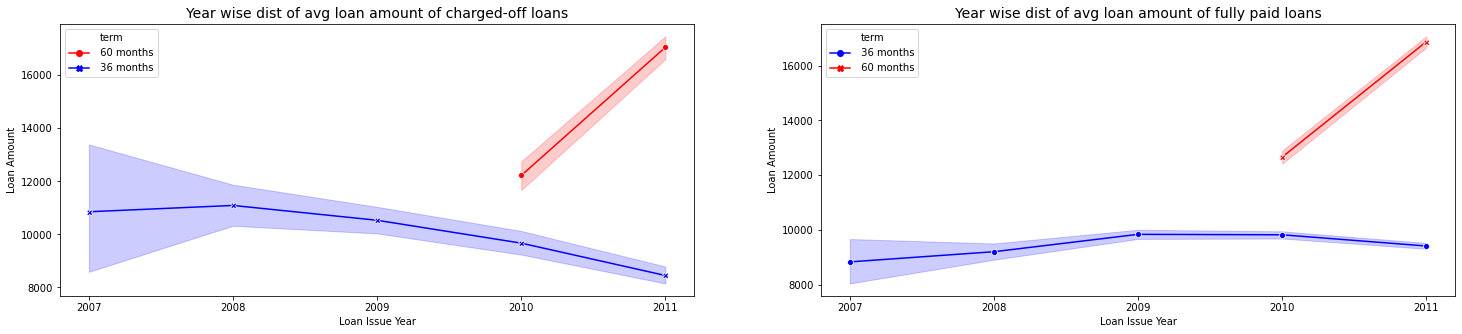

In [54]:
#Term wise and year wise comaprison of loan amount of fully paid and charged off loans


plt.figure(figsize=(25,5))
plt.subplot(1, 2, 1)
palette ={" 60 months":"red"," 36 months":"blue"}
ax1=sns.lineplot(x="issue_d_year", y="loan_amnt", data=only_charged_off, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax1.locator_params(integer=True)
ax1.set_title('Year wise dist of avg loan amount of charged-off loans', fontsize=14)
ax1.set(xlabel='Loan Issue Year', ylabel='Loan Amount')

plt.subplot(1, 2, 2)
ax2=sns.lineplot(x="issue_d_year", y="loan_amnt", data=lndf, hue='term',style="term",markers=True, dashes=False,palette=palette)
ax2.set_title('Year wise dist of avg loan amount of fully paid loans', fontsize=14)
ax2.locator_params(integer=True)
ax2.set(xlabel='Loan Issue Year', ylabel='Loan Amount')

#### Inferance

1. Avg Loan Amount is decreasing every year for charged off loans in 36 month term
2. Avg Loan Amount is increasing every year for fully paid loans in 36 month term till 2010. It decreases slightly in 2011
3. Avg Loan Amount is increasing for 60 month term for both fully paid and charged off loans.

In [55]:
loan_correlation = lndf.corr()
loan_correlation

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year
loan_amnt,1.000000,0.937922,0.301265,0.932260,0.268999,0.062436,0.012940,0.177200,-0.049997,0.256179,-0.035981,0.051902,0.109814
funded_amnt_inv,0.937922,1.000000,0.297473,0.905464,0.251981,0.070663,-0.002800,0.162738,-0.051470,0.242715,-0.041193,0.068091,0.252332
int_rate,0.301265,0.297473,1.000000,0.277203,0.048899,0.110913,0.133362,0.006022,0.098635,-0.046539,0.083027,0.025285,0.039417
installment,0.932260,0.905464,0.277203,1.000000,0.267842,0.052038,0.011014,0.172893,-0.045706,0.229860,-0.033361,0.029439,0.053066
annual_inc,0.268999,0.251981,0.048899,0.267842,1.000000,-0.121530,0.035465,0.156927,-0.017864,0.234534,-0.016224,0.008980,0.008558
dti,0.062436,0.070663,0.110913,0.052038,-0.121530,1.000000,0.002178,0.287849,-0.004742,0.229119,0.005966,0.014197,0.092857
inq_last_6mths,0.012940,-0.002800,0.133362,0.011014,0.035465,0.002178,1.000000,0.093434,0.023726,0.113516,0.015517,0.013356,-0.059495
open_acc,0.177200,0.162738,0.006022,0.172893,0.156927,0.287849,0.093434,1.000000,0.000028,0.687260,0.005803,0.000371,0.011357
pub_rec,-0.049997,-0.051470,0.098635,-0.045706,-0.017864,-0.004742,0.023726,0.000028,1.000000,-0.023494,0.845938,-0.022398,-0.006026
total_acc,0.256179,0.242715,-0.046539,0.229860,0.234534,0.229119,0.113516,0.687260,-0.023494,1.000000,-0.011060,0.002768,0.052972


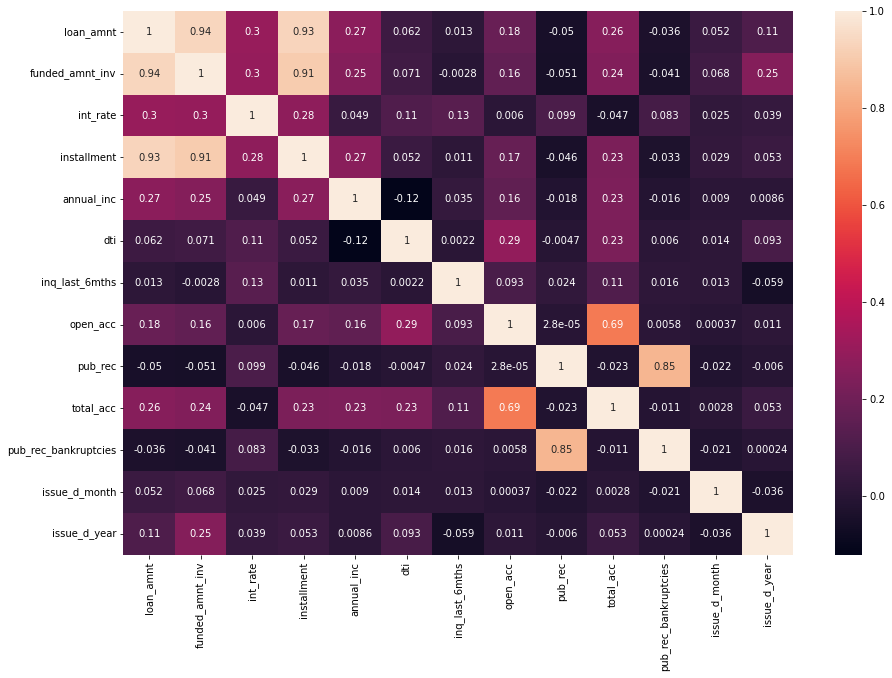

In [56]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)

plt.show() 


#### Insights from the above graph
1. Loan Amount, Funded Amount invested and installment are highly correlated with each other.
2. Annual Income is negatively correlated with DTI.


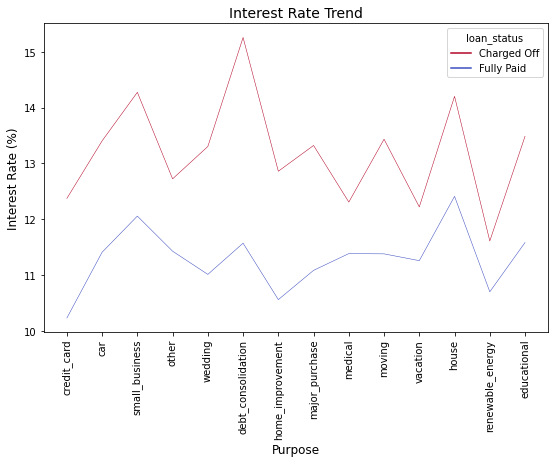

In [57]:
#Trend of Interest rate of fully paid and charged off loans across purpose

fig = plt.figure(figsize=(10,12))
cmap = plt.cm.coolwarm_r
ax3 = fig.add_subplot(212)
by_interest = lndf.groupby(['purpose', 'loan_status']).int_rate.mean()
by_interest.unstack().plot(ax=ax3, colormap=cmap)
ax3.set_title('Interest Rate Trend', fontsize=14)
ax3.set_ylabel('Interest Rate (%)', fontsize=12)
ax3.set_xlabel('Purpose', fontsize=12)


# get the values we want displayed as tick labels
tick_labels = tuple(lndf['purpose'].unique())
# get the positions for the maximum xtick label
x_max = int(max(plt.xticks()[0]))  # int() to convert numpy.int32 => int
# manually set you xtick labels
plt.xticks(range(0, x_max ), tick_labels, rotation=90) 
plt.figure(1).subplots_adjust(
    **dict(left=0.1, right=.8, bottom=.15, top=.9, wspace=.1, hspace=.1))
for line in ax3.lines:
    line.set_linewidth(0.5)

#### Insights from above graph

1. Interest Rate is higher for charged off loans across all purposes.

# Recommendations


1. Lending Club should consider accepting more loans from applicants whose annual income is greater than 100000 as their probablity of charge off is minimum.

2. Higher the loan amount, the higher the chances of loan being charged off. Therefore Lending club should consider accepting loans of lower amount.

3. The maximum no. of loans, 12410 are applied where the loan amount ranges between 5000 and 10000. For this range the probablity of the the loan getting charged off is very less. Hence the risk factor is low for lending club.


4. Lending Club should be wary of giving loans for the purpose of Small Business as the percentage of a loan being charged off is maximum 27.1%. Accepting loans for the purpose of Weddings,major purchase, car and credit card is highly recommended.

5. Lending Club should consider accepting more loans where interest rate is less than 10% as their probablity of charge off is minimum.

6. Lending Club should consider accepting more loans of grade A and B. 

7. Lending Club should consider accepting more loans from people who owns a house as the probality of defaulting is less.

8. The number of loan applicants are increasing with each passing year bringing more business to Lending Club which is leading to more loans getting accepted as well as more loans getting charged off. Moreover the last few months of the year are quite critical as most of the loans are either fully paid or charged off at that time.

9. Lending Club should accept more loans for the term of 36 months as the % of charged off loans is less and the no. of loan applicants are more. Also the avg fully paid loan amount is increasing over the years and avg charged off lon amount is decreasing over the years.